In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading

In [30]:
df = pd.read_csv('../data/Wholesale_customers.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [31]:
'''
Channel = 2 → Retail customer  
Region = 3 → From "Other" region  
Fresh = 12669 → Spent €12,669 on fresh products  
Milk = 9656 → Spent €9,656 on milk products  
Grocery = 7561 → Spent €7,561 on groceries  
Frozen = 214 → Spent €214 on frozen products  
Detergents_Paper = 2674 → Spent €2,674 on detergents/paper  
Delicassen = 1338 → Spent €1,338 on delicacies
'''

'\nChannel = 2 → Retail customer  \nRegion = 3 → From "Other" region  \nFresh = 12669 → Spent €12,669 on fresh products  \nMilk = 9656 → Spent €9,656 on milk products  \nGrocery = 7561 → Spent €7,561 on groceries  \nFrozen = 214 → Spent €214 on frozen products  \nDetergents_Paper = 2674 → Spent €2,674 on detergents/paper  \nDelicassen = 1338 → Spent €1,338 on delicacies\n'

## 2. Data Cleaning

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [33]:
df.duplicated().sum()

0

In [34]:
df.drop(columns=['Channel', 'Region'], inplace=True)

## 3. Preprocess Data

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

print("Shape after scaling:", X_scaled.shape)
X_scaled[0]

Shape after scaling: (440, 6)


array([ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
       -0.06633906])

## 4. Optimal Number of Clusters

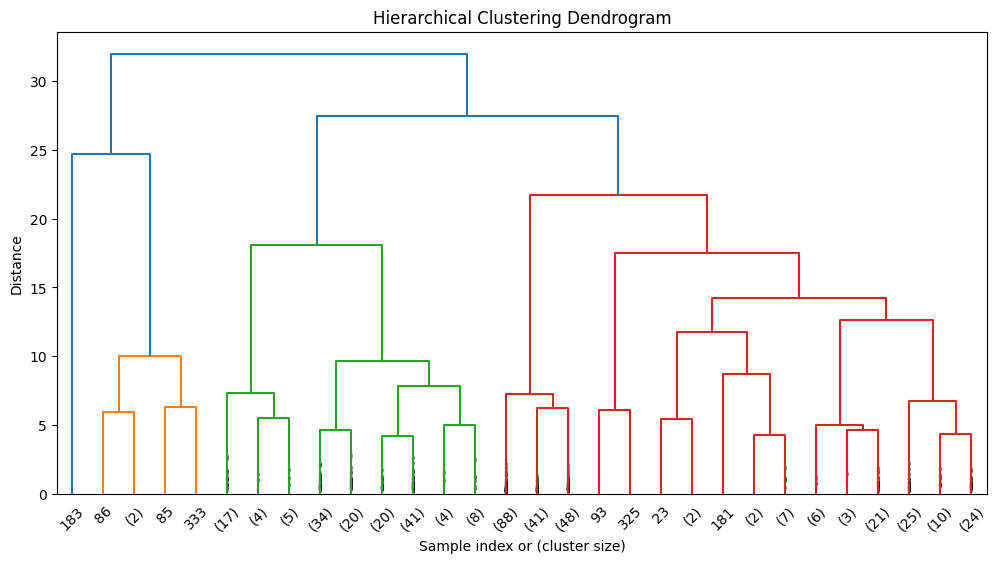

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.savefig('../outputs/results/dendrogram.png')
plt.show()

## 5. Model Building

In [37]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)

df['cluster'] = labels
df['cluster'].value_counts()

cluster
4    177
0    153
2    104
1      5
3      1
Name: count, dtype: int64

## 6. Visualize Clusters

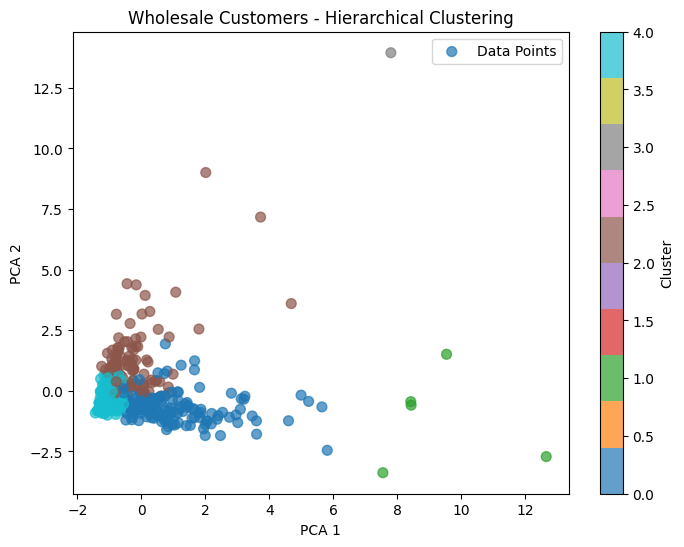

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# clusters = fcluster(...) result or AgglomerativeClustering labels
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="tab10", alpha=0.7, s=50, label="Data Points")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Wholesale Customers - Hierarchical Clustering")
plt.colorbar(label="Cluster")
plt.legend()
plt.savefig('../outputs/results/hierarchical_clusters.png')
plt.show()

## 7. Save and Load Model

In [39]:
import joblib

joblib.dump(hc, '../outputs/models/hierarchical.pkl')
print("Model Saved Successfully")

model = joblib.load('../outputs/models/hierarchical.pkl')

Model Saved Successfully
